In [2]:
import sys

import numpy as np

sys.path.append("..")
from splearn.data.generate import generate_signal # https://github.com/jinglescode/python-signal-processing/blob/main/splearn/data/generate.py
from splearn.filter.butterworth import butter_bandpass_filter_signal_1d, butter_bandpass_filter

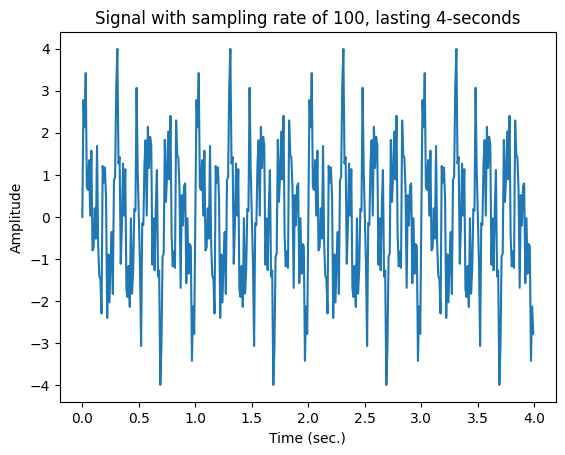

In [3]:
signal_1d = generate_signal(
    length_seconds=4, 
    sampling_rate=100, 
    frequencies=[4,7,11,17,40, 50],
    plot=True
)

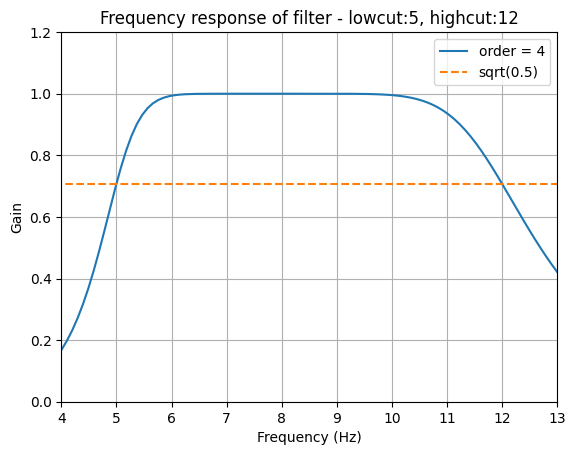

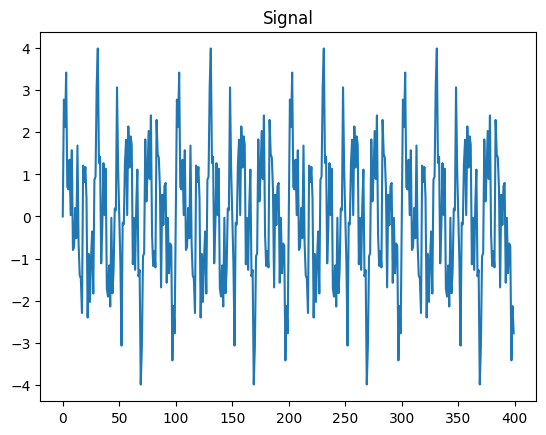

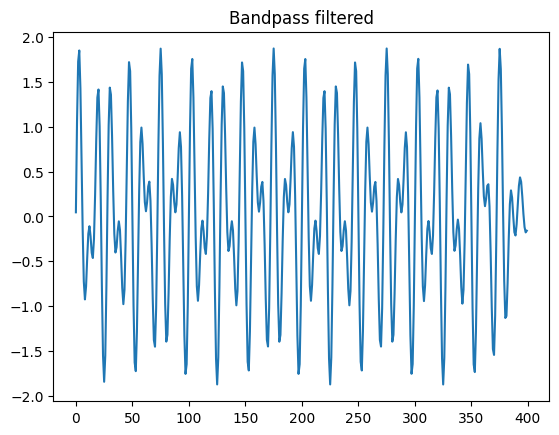

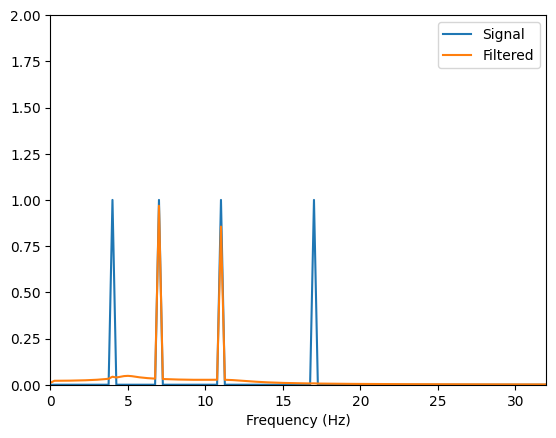

Input: Signal shape (400,)
Output: Signal shape (400,)


In [4]:
signal_1d_bandpassed = butter_bandpass_filter_signal_1d(signal_1d, lowcut=5, highcut=12, sampling_rate=100, order=4, verbose=True)

In [5]:
from numpy import dot
from numpy.linalg import norm

signal_target = generate_signal(length_seconds=4, sampling_rate=100, frequencies=[7,11])
cosine_similarity = dot(signal_target, signal_1d_bandpassed)/(norm(signal_target)*norm(signal_1d_bandpassed))
print("Cosine similarity:", cosine_similarity)

Cosine similarity: 0.9839477279810867


Signal shape: (1, 1, 400)


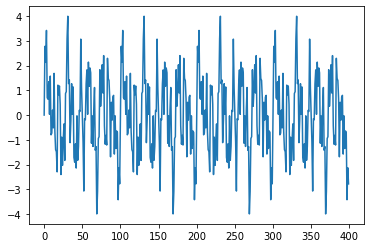

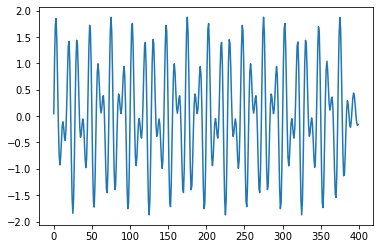

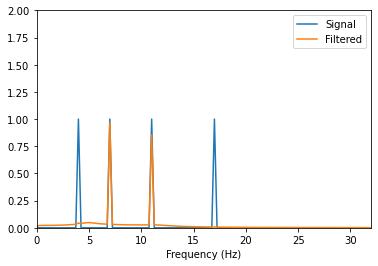

Input: Signal shape (1, 1, 400)
Output: Signal shape (1, 1, 400)
Filtered signal shape: (1, 1, 400)


In [5]:
signal = np.expand_dims(signal_1d, 0)
signal = np.expand_dims(signal, 0)
print("Signal shape:", signal.shape)

signal_bandpassed = butter_bandpass_filter(signal, lowcut=5, highcut=12, sampling_rate=100, order=4, verbose=True)
print("Filtered signal shape:", signal_bandpassed.shape)
